<font color='blue'>Снова привет! Итак, первый модуль почти завершен, проделана огромная работа, приобретено множество новых знаний, проведено не одно интересное исслелование, так держать! Это снова я, Алексей. Я проверю твой сборный проект и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда можно лучше)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.  
    Наличие критичного или трех и более некритичных замечаний является поводом для отправки проекта на доработку.

---
Апдейт после проверки: как и в прошлый раз, хорошая работа, осталось довести до идеала.  
Более подробно см. блок в конце.
</font>

<font color='teal'> 
    Произведенные изменения:
    
    Раздел 2
- добавлена замена пропусков в столбце рейтинг (подстановка значений для той же игры на других платформах)
    
    Раздел 3
- добавлен линейный график зависимости продаж для актуального периода без последнего неполного года
- добавлен график "ящик с усами" для определения средних продаж всех игр для топ5 игровых платформ
 - произведен расчет коэффициентов корреляции между продажами и отзывами критиков и пользователей для топ5 платформ и добавлен промежуточный вывод. Скорректирован общий вывод для раздела
 
    Раздел 4
- добавлены столбчатые диаграммы

    Раздел 5
- Скорректирован вывод, как для печати, так и ко всему разделу
 
Скорректирован общий вывод
    
    
    
    
    
    
    
 </font>   

<b>UPD: <font color='blue'>Благодарю, очень удобное резюме. Мои апдейты будут в жирном шрифте.

## Постановка задачи:
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных:
* 		Name — название игры
* 		Platform — платформа
* 		Year_of_Release — год выпуска
* 		Genre — жанр игры
* 		NA_sales — продажи в Северной Америке (миллионы долларов)
* 		EU_sales — продажи в Европе (миллионы долларов)
* 		JP_sales — продажи в Японии (миллионы долларов)
* 		Other_sales — продажи в других странах (миллионы долларов)
* 		Critic_Score — оценка критиков (максимум 100)
* 		User_Score — оценка пользователей (максимум 10)
* 		Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.


## План работ:
- загрузка и знакомство с данными, изучение общей информации, составление плана предобработки
- подготовка данных для анализа(приведение данных к нужному типу, работа с пропусками, обоснование своих действий)
- анализ данных 
- построение портрета типичного пользователя каждого региона
- проверка гипотез 
- подведение итогов


## 1. Знакомство с данными

загрузка необходимых библиотек

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

загрузим данные

In [4]:
games = pd.read_csv('/datasets/games.csv')

и изучим информацию о датафрейме:

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


имена колонок заданы с прописной буквы, у некоторых колонок неверно задан тип данных

In [6]:
games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13194,Guild 01,3DS,2012.0,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
10865,Ouchi Mainichi Tamagotchi,3DS,2012.0,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
16559,Katekyoo Hitman Reborn! Kindan no Yami no Delta,Wii,2008.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
8301,Macross Ultimate Frontier,PSP,2009.0,Action,0.00,0.00,0.17,0.00,NaN,NaN,NaN
952,Kirby: Triple Deluxe,3DS,2014.0,Platform,0.61,0.34,0.79,0.09,80.0,8.8,E


даже по пяти случайныv записям видно, что данные содержат пропуски, так же присутствует аббревиатура 'tbd' в колонке 'User_Score', что объясняет присвоенный ей тип 'object'

Проверим на наличие дубликатов:

In [7]:
games.duplicated().sum()

0

выясним в каком временном промежутоке находятся наши данные:

In [8]:
games['Year_of_Release'].nsmallest(1)

262    1980.0
Name: Year_of_Release, dtype: float64

In [9]:
games['Year_of_Release'].nlargest(1)

94    2016.0
Name: Year_of_Release, dtype: float64

Оценим число и % пропусков в каждой колонке:

In [10]:
missed=games.isnull().sum()
percent=(games.isnull().sum()/games.isnull().count())*100
missing_data=pd.concat([missed,percent],axis=1, keys=['Missed','% missed']).sort_values(by='Missed',ascending=False)
missing_data.round(2)

,Missed,% missed
Critic_Score,8578,51.32
Rating,6766,40.48
User_Score,6701,40.09
Year_of_Release,269,1.61
Name,2,0.01
Genre,2,0.01
Platform,0,0.00
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00


Посмотрим на данные в столбцах с наибольшим количеством пропусков:

In [11]:
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Присутствует значение '0' так что придется для замены Nan использовать другое значение

<font color='blue'>Но можно и просто оставить пропуски, как есть.

In [12]:
games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [13]:
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

согласно:https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board  ESRB основана в 1994 году. Так как данные у нас с 1980 года, то этим отчасти можно объяснить отсутствие рейтингов для значительного количества записей таблицы. Из этой же статьи узнаем, что первоначально введенный рейтинг 'K-A'(kids to adults) устарел и вместо него применяется 'E'(everyone), что дает нам повод произвести соответствующую замену, так же нужно заменить значения "RP" («Rating Pending») — «Рейтинг ожидается» на NaN, с последующей обработкой. "ожидается" равносильно отсутствию рейтинга.

### Выводы
Датасет содержит 16715 записей и 11 колонок,полные дубликаты отсутствуют. Все данные находятся в промежутке между  1980 и 2016 годами. Данные по продажам полные.

Для остальных данных может быть предложен следующий план предобработки:

-  названия колонок нуждаются в приведении к нижнему регистру
- необходима смена типов данных для колонок 'Year_of_Release' на 'int' и 'User_Score' на 'float'
- параметр 'tbd'(to be deteremined- будет определено) в столбце 'User_Score' можно заменить на NaN, полагая что игра не набрала достаточно отзывов для вычисления рейтинга считаем, что его нет.
- Пропуски в колонках рейтингов игр Critic_Score и User_Score, где отсутствует рактически половина данных, целесообразно заполнить индикаторным значением '-9999'. (Значение '-9999' выбрано по аналогии с тем, как заполняются пропущенные значения в метеоданных)
- Пропуски в столбцах Rating, Name, Genre заменить на  информация недоступна - 'not_aval' .
- Строки в таблице с отсутствующим годом выпуска удалим, так практически весь последующий анализ будет проводиться в разрезе года выпуска игры.

<font color='green'>Открыли и подробно изучили данные, нашли основные проблемы, использовали методы первичного изучения, хорошо.

## 2. Подготовка данных

Заменим прописные буквы на строчные в названиях столбцов:

In [14]:
games.columns = games.columns.str.lower()

Произведем преобразования колонки user_score:

In [15]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')
games['user_score'] = games['user_score'].fillna(-9999)

<font color=green>Верно, tbd в данном случае равнозначны пропускам.

Произведем преобразования колонки critic_score:

In [16]:
games['critic_score'] = games['critic_score'].fillna(-9999)

Обработка столбца с годами выпуска и удаление пропущенных значений:

In [17]:
games.dropna(subset=['year_of_release'], inplace = True)
games['year_of_release'] = games['year_of_release'].astype('int')

Попробуем частично заполнить ячейки с отсутствующим рейтингом для конкретной платформы если для той же игры на  других платформах значение имеется.

создадим словарь:

In [18]:
games_rating=games.set_index('name')['rating'].to_dict()

произведем замену и оценим результат:

In [19]:
print('число пропусков до подстановки',games['rating'].isna().sum())
games['rating']=games['rating'].fillna(games['name'].map(games_rating))
print('число пропусков после подстановки',games['rating'].isna().sum())

число пропусков до подстановки 6678
число пропусков после подстановки 6485


<b>UPD: <font color='green'>Немного, зато достоверно.

Актуализируем значения рейтинга ESRB (замена устаревшего маркера 'K-A' на 'E') и помечаем отсутствующие данные:

In [20]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'
games.loc[games['rating'] == 'RT', 'rating'] = np.nan
games['rating'] = games['rating'].fillna('not_aval')

<s><font color='brown'>Здесь можно попробовать частично заполнить пропуски, взяв рейтинг это же игры из "соседней" платформы. Они, в отличие от оценок, должны свпадать.

Заполним пропуски в колонках 'genre' и 'name':

In [21]:
games['genre'] = games['genre'].fillna('not_aval')
games['name'] = games['name'].fillna('no_aval')

Вычислим суммарные продажи по всем регионам и добавим соответствующую колонку к нашему датафрейму:

<font color=green>Очистили данные ➡ посчитали новые параметры. Это очень правильный порядок.

In [22]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

посмотрим на результат:

In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
name               16446 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16446 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       16446 non-null float64
user_score         16446 non-null float64
rating             16446 non-null object
total_sales        16446 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Выводы
Проведена подготовка данных для дальнейшего исследовательского анализа.
- стандартизованы имена столбцов
- изменены типы данных, там где это необходимо
- заполнены пропуски 
- удалены строки с отсутствующей информацией о годе выпуска 
- добавлена колонка с данными по суммарным продажам

<font color='green'>Итак, с пропусками разобрались, привели данные к нужному формату, общие продажи посчитали, отлично.

## 3. Исследовательский анализ данных
* 		Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* 		Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* 		Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* 		Не учитывайте в работе данные за предыдущие годы.
* 		Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* 		Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
* 		Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* 		Соотнесите выводы с продажами игр на других платформах.
* 		Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


Представим количество игр выпущенных в разные годы на графике:

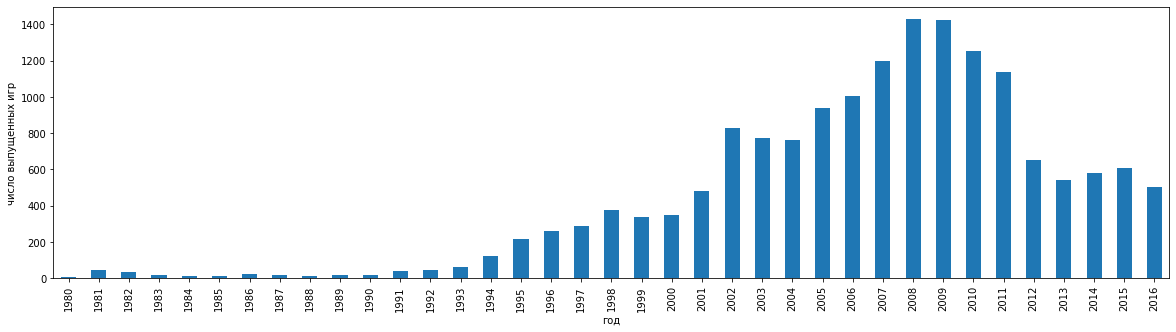

In [24]:
games.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(20,5));
plt.xlabel('год')
plt.ylabel('число выпущенных игр')
plt.show()

Из представленных на графике данных очевидно, что  развитие игровой  индустрии шло синхронно развитию компьютерных технологий(процессоры, видеокарты, объемы носителей информации, ПО итд) Очевиден "ровный" период с 80 по 92 год, подъем с 1993 по 2008( c момента появления процессоров семейства "Pentium", развитие GUI итд.) С 2009 по 2013 очевидный спад( появление смартфонов и доступный интернет с онлайн играми). Период относительной стабилизации 2012-2016 при этом объем продаж уменьшается почти вдвое по сравнению с пиковыми показателями 2008, 2009гг.

Для прогноза на 2017 год нужно в качестве актуального периода выбрать интервал 2012-2016

<font color='green'>Очень наглядный график. Хотя пока не вполне понятно обоснование выбора периода.

Построим график продаж игр по различным платформам:

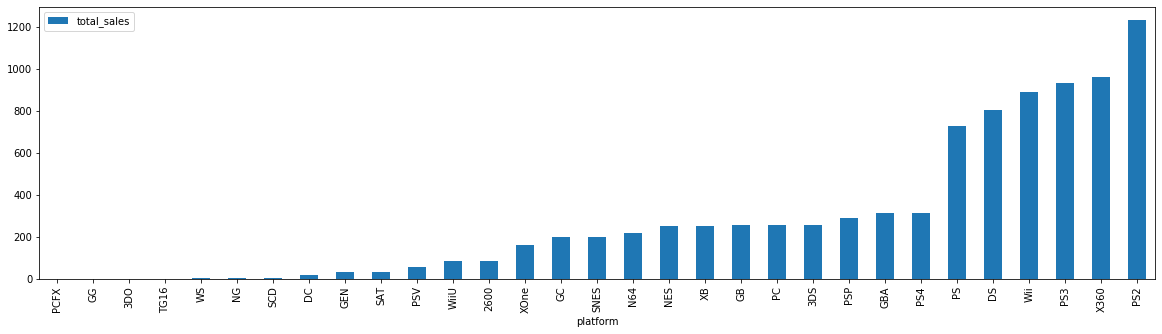

In [25]:
platform_sales = (games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
    )
platform_sales.plot(kind='bar', figsize=(20,5))
plt.show()

Видно, что  в безусловных лидерах продаж находются игры для платформы PS2. Замыкает группу лидеров продажи для игровой платформы PS, опережающих платформу PS4 , более чем в 2 раза.

Для большей наглядности представим данные по продажам для первых десяти платформ в виде таблицы:

In [26]:
top10=games.pivot_table(index='platform', values ='total_sales', aggfunc=['sum'])
top10.columns=['total_sales']
top10 = top10.sort_values(by='total_sales',ascending=False).round().head(10)
top10

,total_sales
platform,
PS2,1234.0
X360,961.0
PS3,931.0
Wii,891.0
DS,803.0
PS,728.0
PS4,314.0
GBA,313.0
PSP,290.0


Для анализа продаж по годам возьмем первые шесть платформ.

Для них объем продаж более чем вдвое отличается от остальных:

In [27]:
top6=top10.sort_values(by='total_sales',ascending=False).head(6)

In [28]:
top6.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

получим названия топ6 платформ:

In [29]:
top6_names=top6.index

Определим функцию для расчета продаж по годам:

In [30]:
def platform_sales_by_year(name, df):
    return (
        df  .query("platform == @name") 
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

И построим линейные графики зависимости продаж от года для выбранных нами платформ:

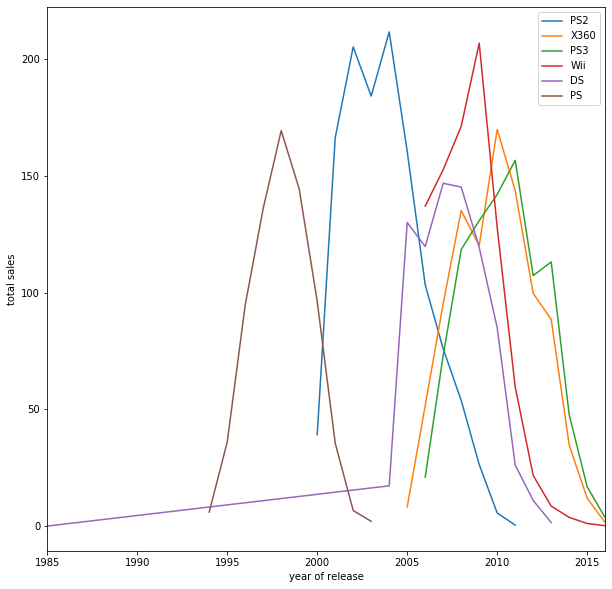

In [31]:
for platform_name in list(top6_names):
    platform_sales_by_year(platform_name, games)['total_sales'].plot(figsize=(10, 10), label=platform_name)
    plt.xlabel("year of release")
    plt.ylabel("total sales")
    plt.legend()

Зависимость объема продаж от годам всех шести платформ достаточно схожи - от роста  продаж с нуля  до полного падения  проходит приблизительно 10 лет. Причем пик продаж приходится на первые пять, шесть лет.  Отметим отличие для продаж игр на платформе Wii. Для этой платформы мы видим большое количество продаж уже в первый год выпуска (хорошая рекламная компания предшествовала выпуску?)

Данные за актуальный период  (2012-2016) выделим эти строки в отдельный датафрейм:

In [32]:
actual = games.query('2012 <= year_of_release <= 2016')

<font color='green'>С выбором периода согласен. Все устаревшие платформы уже утратили позиции, а новые на подходе.

Посмотрим сколько платформ попали в актуальный период для прогноза:

In [33]:
print('Всего игровых платформ -', games['platform'].unique().shape[0])
print('актуальных игровых платформ -', actual['platform'].unique().shape[0])

Всего игровых платформ - 31
актуальных игровых платформ - 11


Определим лидеров по продажам в период с 2012 по 2016:

In [34]:
actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

Можно выделить первые пять платформ, как наиболее перспективные и прибыльные

Оценим динамику продаж наиболее перспективных платформ (первые 5 с продажами более 150 млн.), для чего построим линейный график.



In [35]:
actual_top=actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

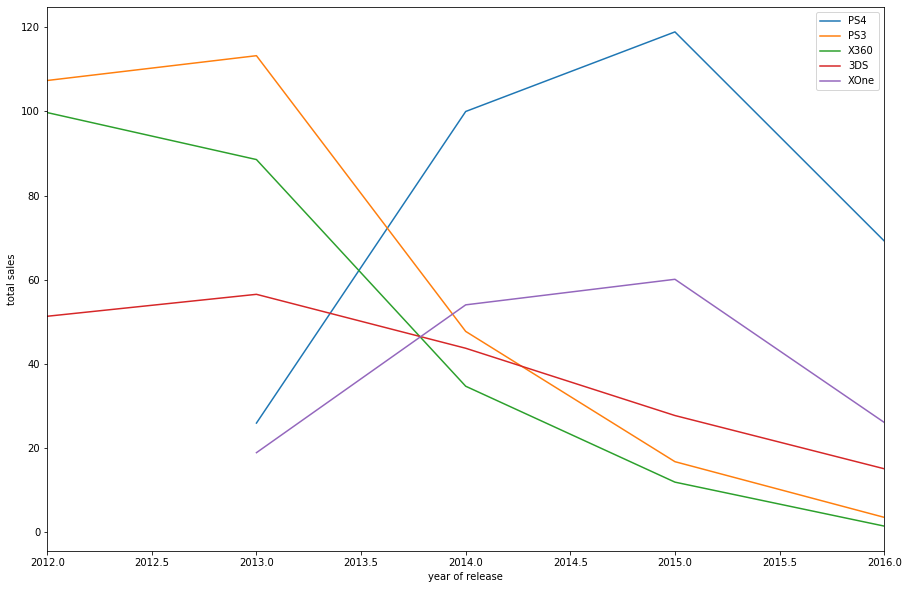

In [36]:
for platform_name in list(actual_top.index):
    platform_sales_by_year(platform_name, actual)['total_sales'].plot(figsize=(15, 10), label=platform_name)
    plt.xlabel("year of release")
    plt.ylabel("total sales")
    plt.legend()

Даже у самых прибыльных платформ наблюдается отрицательный рост продаж. Причем, если для платформ PS3 и X360 продажи к 2016 снизились практически до нуля, то в PS4 еще есть возможность заработать на спаде продаж.

Теперь оценим продажу игр для различных платформ за актуальный период и определим десятку лидеров:


<s><font color='brown'>Данные за 2016-й год неполные, соответственно, тенденции стоит смотреть с 12-го по 15-й.  
PS3 и X360 уже попросту отжили свое и уступают место приемницам.

Посмотрим есть ли разница если анализировать данные только за полные годы( без 2016):

In [37]:
actual_1215=actual.query('2012 <= year_of_release <= 2015')

In [38]:
actual_1215.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS3     285.19
PS4     244.89
X360    235.02
3DS     179.47
XOne    133.17
WiiU     77.59
PC       57.40
PSV      44.93
Wii      35.19
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

In [39]:
actual_1215_top=actual_1215.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

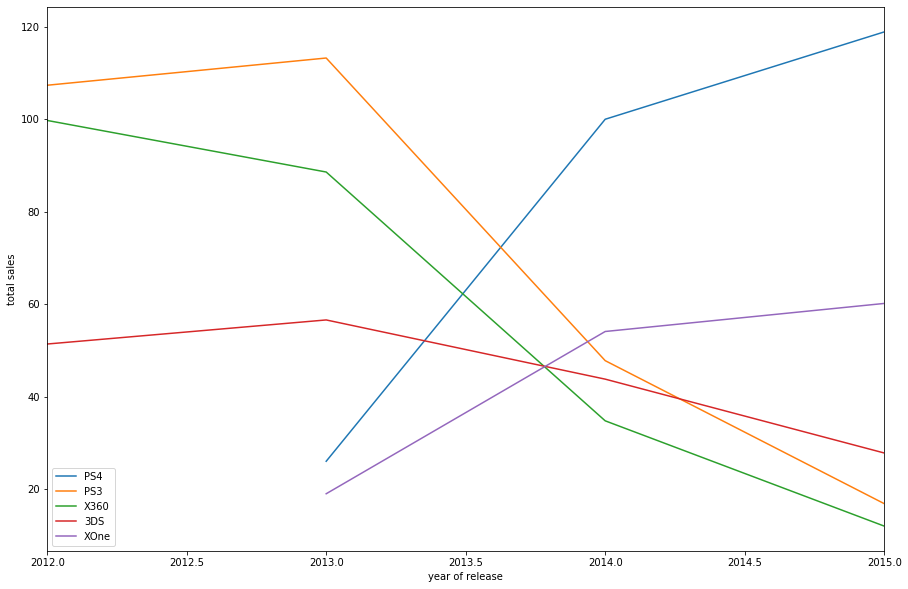

In [40]:
for platform_name in list(actual_top.index):
    platform_sales_by_year(platform_name, actual_1215)['total_sales'].plot(figsize=(15, 10), label=platform_name)
    plt.xlabel("year of release")
    plt.ylabel("total sales")
    plt.legend()

Без учета данных за 2016 год(неполных) видна тенденция к росту продаж на платформах PS4 и XOne. Остальные платформы  демонстрируют падение продаж. Список топ игровых платформ отстался практически без изменений

In [41]:
top_games = actual.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(10)
top_games

name
Grand Theft Auto V                56.58
Call of Duty: Black Ops II        29.40
Call of Duty: Ghosts              27.39
Call of Duty: Black Ops 3         25.67
Minecraft                         24.16
Call of Duty: Advanced Warfare    21.97
FIFA 15                           17.37
FIFA 14                           16.46
FIFA 16                           16.30
FIFA Soccer 13                    15.97
Name: total_sales, dtype: float64

и построим график: 

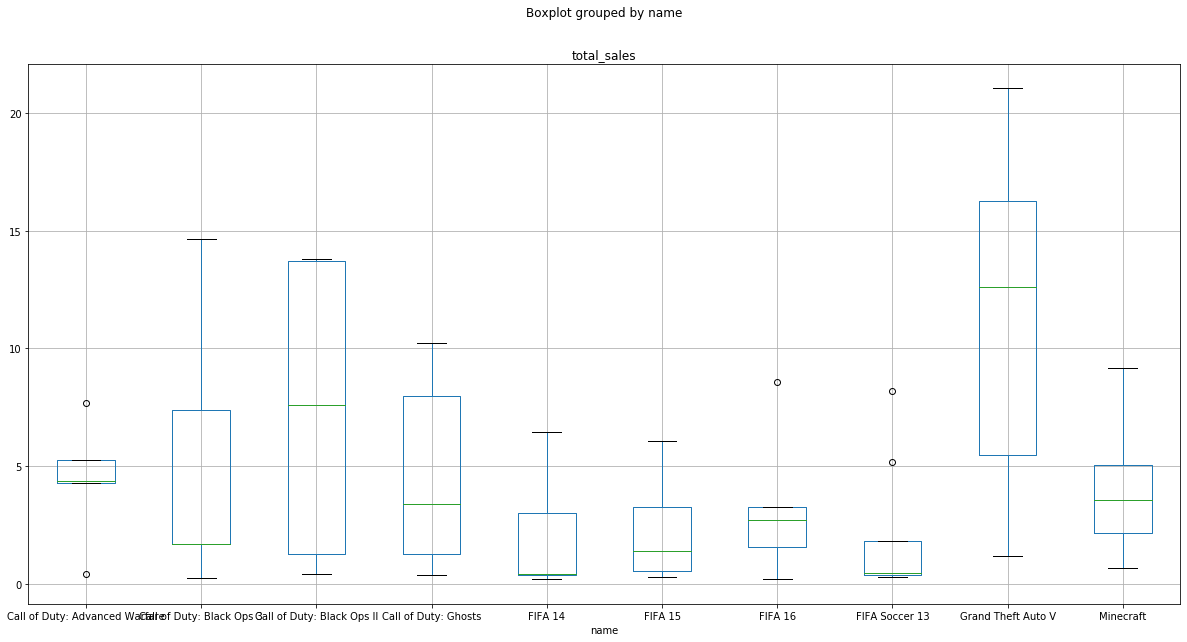

In [42]:
actual.query('name in @top_games.index').boxplot( by='name', column='total_sales',figsize=(20,10))
plt.show()

Распределение продаж для 10 самых продающихся игр по платформам:

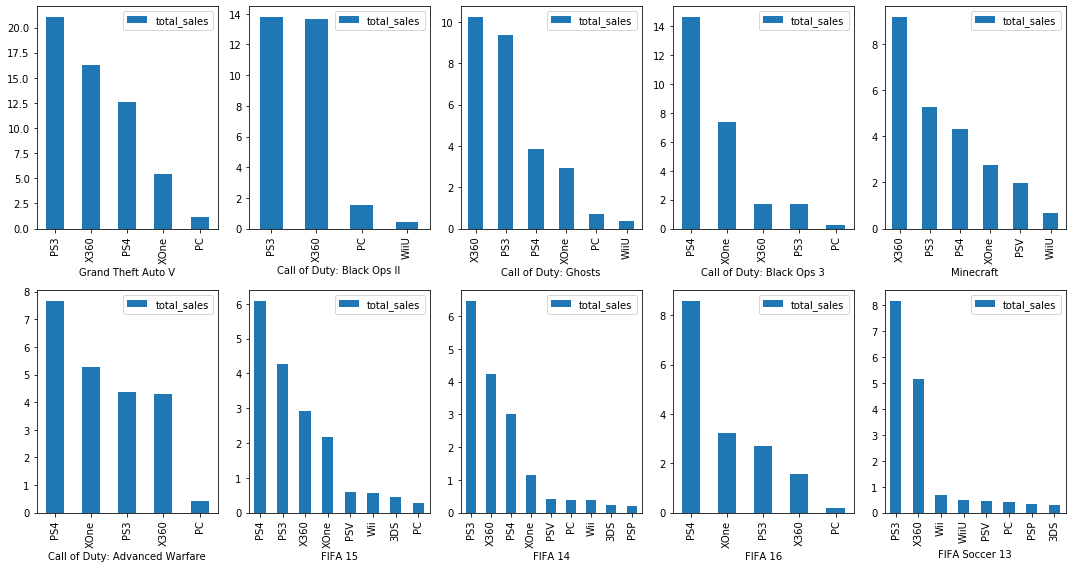

In [43]:
plt.subplots(2,5,figsize=(15,8))
i = 1
for game in top_games.index:
    ax=plt.subplot(2,5,i)
    actual.query('name==@game').plot(kind='bar', x='platform', y='total_sales', ax=ax)
    ax.set_xlabel(game)
    i += 1
plt.tight_layout()

Популярные игры, как правило, лучше всего продаются для платформ- X360,PS3. Продажи для платформ РС и Wii значительно меньше.

<font color='blue'>Здесь стоит учесть, что, вероятно, X360 и PS3 имели больше времени для продажи этих игр, ввиду своего возраста.

<font color='red'>Хорошее исследование, но в задании нас просят сделать несколько другое. Давай посмотрим на продажи всех игр с разбивкой по платформам: есть ли разница в среднем чеке между XOne и PS4? (`.boxplot(by='name', ...)`)

Отличие в средних продажах для разных платформ за актуальный период:

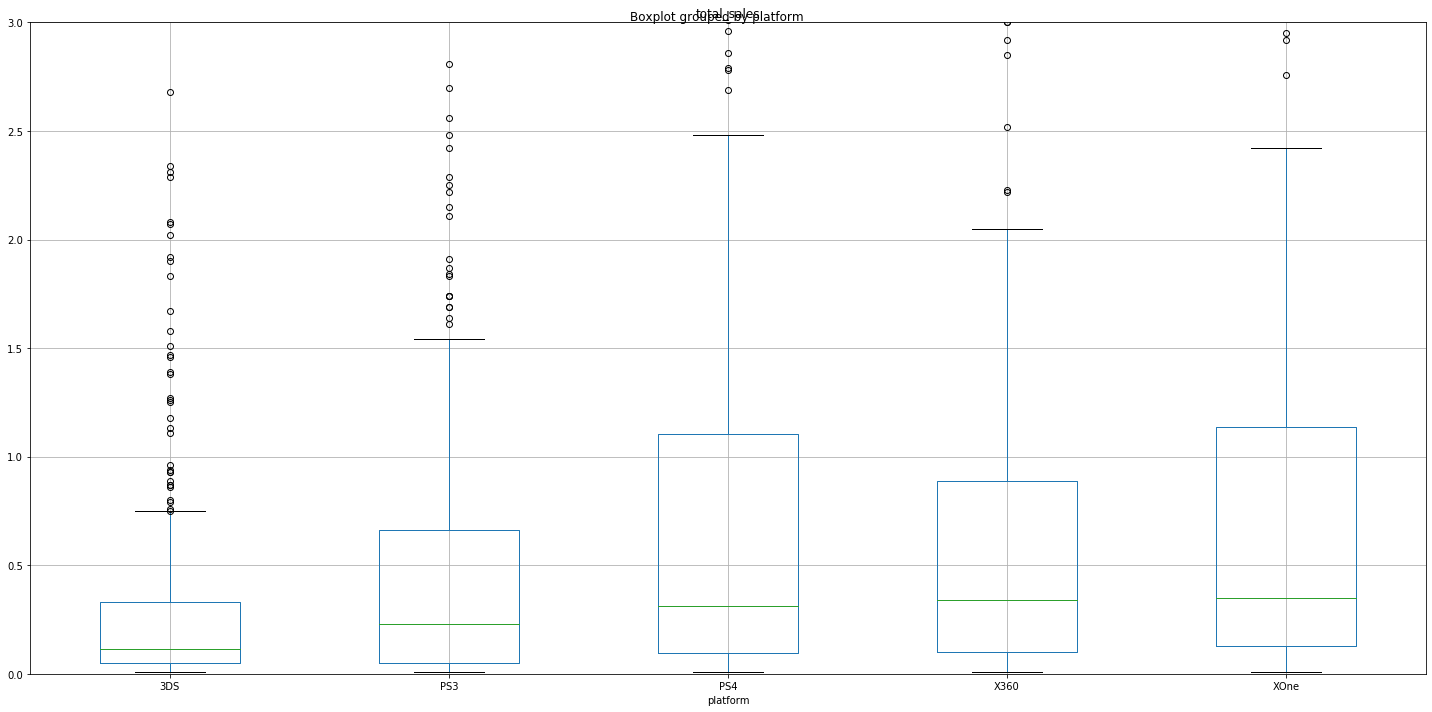

In [44]:
actual_1215.query('platform in @actual_top.index').boxplot( by='platform', column='total_sales',figsize=(20,10),)
plt.ylim(0,3)
plt.tight_layout()
plt.show()

<b>UPD: <font color='green'>Я опечатался, но ты понял, о чем речь :)

In [45]:
actual_1215.groupby('platform')['total_sales'].mean()

platform
3DS     0.512771
DS      0.404839
PC      0.292857
PS3     0.626791
PS4     1.074079
PSP     0.064682
PSV     0.137822
Wii     0.663962
WiiU    0.583383
X360    0.842366
XOne    0.832312
Name: total_sales, dtype: float64

Средние продажи игр для PS4 на 20% выше чем для XOne в актуальный период.

Влияние отзывов пользователей и критиков на продажи в рамках одной популярной платформы.

Выберем игровую платформу для которой в актуальный период было выпущено больше всего игр:

In [46]:
actual.groupby(['platform'])['name'].count().sort_values(ascending=False).nlargest(1)

platform
PS3    493
Name: name, dtype: int64

И построим графики рассеяния(памятуя, что отсутствующие значения рейтинга мы определили, как "-9999"):

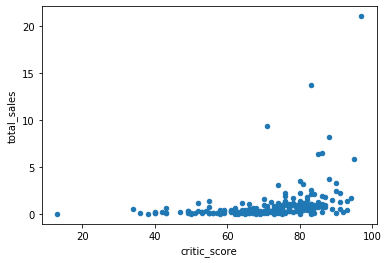

In [47]:
actual.query('platform=="PS3"and critic_score >=0').plot(kind='scatter', x='critic_score', y='total_sales')
plt.show()

и вычислим коэффициент корреляции:

In [48]:
(actual.query('platform=="PS3"and critic_score >=0')['critic_score'].corr(actual
       .query('platform=="PS3"and critic_score >=0 ')['total_sales']))

0.3314972592629587

для пользовательского рейтинга:

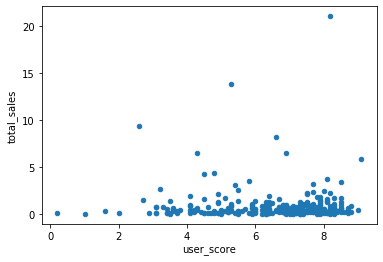

In [49]:
actual.query('platform=="PS3"and user_score >=0').plot(kind='scatter', x='user_score', y='total_sales')
plt.show()

In [50]:
(actual .query('platform=="PS3"and user_score >=0')['user_score']
        .corr(actual.query('platform=="PS3"and user_score >=0')['total_sales']))

-0.005143522887113815

Анализ данных за актуальный период для платформы PS3 показал:
- присутствует небольшая взаимосвязь между отзывами критиков и продажами
- Взаимосвязи между отзывами пользователей и продажами нет

Тем не менее по диаграмме рассеяния видно, что чем выше оценки критиков, тем выше продажи игр и возможно покупатели к отзывам критиков все же прислушиваются.

<s><font color='brown'>Все верно, но предлагаю взять другие платформы и проверить, какова данная картина в них (можно в цикле). Возможно, мы найдем платформы, где продажи сильнее зависят от оценок?

Проверим есть ли зависимость для остальных платформ

Связь с отзывами критиков:

In [51]:
for platform in actual_top.index:
    df = actual.query('platform==@platform and critic_score >=0')
    print(platform,df['critic_score'].corr(df['total_sales']).round(3))

PS4 0.407
PS3 0.331
X360 0.361
3DS 0.321
XOne 0.417


и пользователей

In [52]:
for platform in actual_top.index:
    df = actual.query('platform==@platform and user_score >=0')
    print(platform,df['user_score'].corr(df['total_sales']).round(3))

PS4 -0.032
PS3 -0.005
X360 0.006
3DS 0.198
XOne -0.069


Для всех топ5 игровых платформ есть примрно одинаковая положительная зависимость между продажами и отзывами критиков. Пользовательские отзывы в небольшой степени влияют на продажи игр на платформе 3DS

<b>UPD: <font color='green'>Отлично.

Посмотрим как распределяются продажи игр по жанрам:

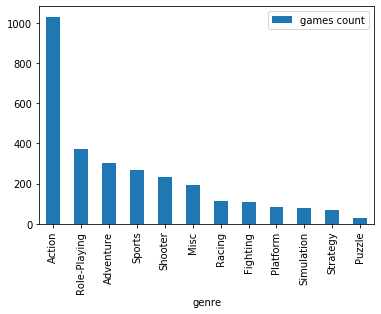

In [53]:
(actual.groupby('genre')['name'].count()
        .sort_values(ascending=False).plot(kind='bar', label='games count', legend=True)
)
plt.show()

И какие игровые жанры приносят больше прибыли:

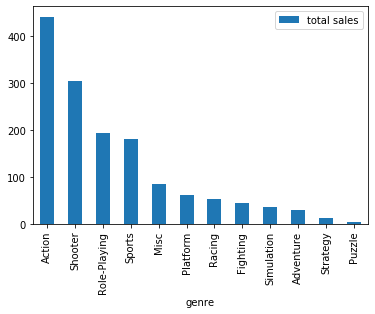

In [54]:
(actual.groupby('genre')['total_sales']
       .sum().sort_values(ascending=False).plot(kind='bar', label='total sales', legend=True))
plt.show()

Наибольшее количество игр выпущено в жанре Action. Игры этого жанра и характеризуются наибольшим объемом продаж. В целом, наблюдается прямая зависимость между количеством игр определенного жанра и объемом продаж.

<font color='blue'>Это логично, так как сумма продаж непосредственно зависит от количества выпущенных игр.  
    Здесь также можно взглянуть на средний чек по жанрам (функция аггрегации mean). Возможно стратегий просто мало производят, поэтому и суммарные продажи небольшие.

## Вывод.
- определен акутальный период (2012 - 2016 гг.)
- определена продолжительность жизни платформы (около 10 лет)
- Для актуального периода определены топ 5 самых прибыльных платформ: PS3, X360, PS4, 3DS, XOne.
- Для платформ 3DS,PS3, X360 наблюдаетя падение продаж  к 2016 году XOne,PS4 демонстрируют рост и могут считаться перспективными.
- определены топ 5 самых продаваемых игр: Call of Duty: Black Ops II, Call of Duty: Ghosts, Call of Duty: Black Ops 3,Minecraft.                  
- Для самых продающихся игр самый большой разброс продаж
- В лидерах по продажам для популярных игр одни и те же платформы. Х360, PS3, PS4 как правило, всегда в лидерах продаж. 
- Имеется зависимость для всех платформ между оценкой критиков и продажами
- зависимость между оценкой пользователей и продажами отмечена только для платформы 3DS
- количество выпущенных игр определенного жанра напрямую связано с продажами

<font color='green'>Все верно. Выводы понятны и аргументированы.

## 4. Портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
* 		Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* 		Самые популярные жанры (топ-5). Поясните разницу.
* 		Влияет ли рейтинг ESRB на продажи в отдельном регионе?


Для характеристик предпочтений пользователей регионов будем использовать данные по региональным продажам 

Определим самые популярные игровые платформы для регионов и долю их продаж от мировых.

Для Северной Америки:

In [55]:
top_platforms=actual.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum')

top_platforms['%of total sales']=(top_platforms['na_sales']/top_platforms['total_sales'])*100
top5=top_platforms.sort_values(by='na_sales',ascending=False).round().head(5)
top5

,na_sales,total_sales,%of total sales
platform,,,
X360,140.0,237.0,59.0
PS4,109.0,314.0,35.0
PS3,103.0,289.0,36.0
XOne,93.0,159.0,58.0
3DS,55.0,195.0,28.0


и построим график:

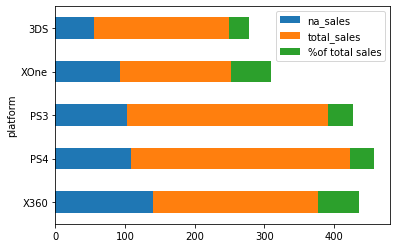

In [56]:
top5.plot.barh( stacked = True)

Для Европы:

In [57]:
top_platforms_eu=actual.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum')

top_platforms_eu['%of total sales']=(top_platforms_eu['eu_sales']/top_platforms['total_sales'])*100
top5_eu=top_platforms_eu.sort_values(by='eu_sales',ascending=False).round().head(5)
top5_eu

,eu_sales,total_sales,%of total sales
platform,,,
PS4,141.0,314.0,45.0
PS3,107.0,289.0,37.0
X360,75.0,237.0,32.0
XOne,52.0,159.0,32.0
3DS,43.0,195.0,22.0


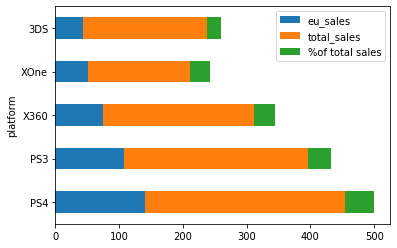

In [58]:
top5_eu.plot.barh( stacked = True);

Для Японии:

In [59]:
top_platforms_jp=actual.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum')

top_platforms_jp['%of total sales']=(top_platforms_jp['jp_sales']/top_platforms['total_sales'])*100
top5_jp=top_platforms_jp.sort_values(by='jp_sales',ascending=False).round().head(5)
top5_jp

,jp_sales,total_sales,%of total sales
platform,,,
3DS,88.0,195.0,45.0
PS3,35.0,289.0,12.0
PSV,21.0,49.0,43.0
PS4,16.0,314.0,5.0
WiiU,13.0,82.0,16.0


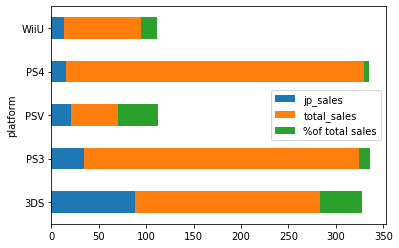

In [60]:
top5_jp.plot.barh( stacked = True);

Для Европы и Северной Америки самыми популярными являются платформы PS3,PS4 и X360. В Америке X360 лидер по продажам. На японском рынке в тройке наиболее продаваемых присутсвует только PS3, а безусловным лидером рынка является 3DS. Интересно отметить, что на платформу лидера продаж в регионе, а это X360 для Америки, PS4 для Европы и 3DS для Японии, приходится практически половина мировых продаж, от 45 до 59 процентов.

Определим самые популярные жанры игр для регионов:

In [61]:
top_genres = actual.pivot_table(index='genre', values=['na_sales', 'jp_sales', 'eu_sales'], aggfunc='sum')
na_top = top_genres['na_sales'].nlargest(5)
eu_top = top_genres['eu_sales'].nlargest(5)
jp_top = top_genres['jp_sales'].nlargest(5)


представим наглядно
для Северной Америки:

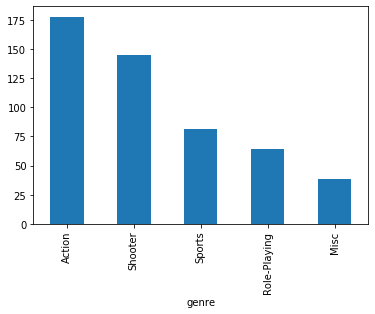

In [62]:
na_top.plot.bar();

Европы:

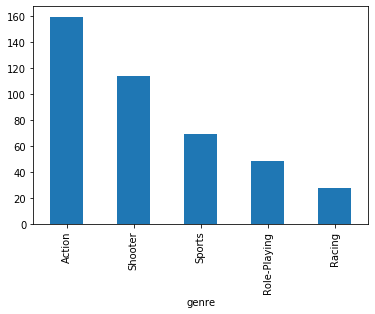

In [63]:
eu_top.plot.bar();

И Японии:

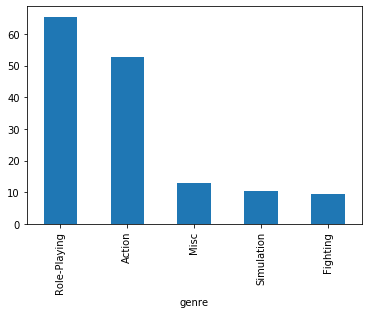

In [64]:
jp_top.plot.bar();

после чего сведем результаты для наглядности в одну таблицу:

In [65]:
regional_preferences = pd.DataFrame(data={ 'NA':na_top.index,'EU':eu_top.index, 'JP':jp_top.index}, index=range(1,6))
regional_preferences

,NA,EU,JP
1,Action,Action,Role-Playing
2,Shooter,Shooter,Action
3,Sports,Sports,Misc
4,Role-Playing,Role-Playing,Simulation
5,Misc,Racing,Fighting


<font color='green'>Очень элегантно!

У европейцев и американцев практически одинаковые предпочтения- на первом месте игры жанра Action затем Shooter и Sports. Японцы предпочитают ролевые игры, а Actin лишь на третьем месте. Разница в предпочитаемых жанрах возможно связана с особенностями японского/восточного менталитета.

Посмотрим теперь как влияет рейтинг ESRB на продажи в регионах.


In [66]:
rating_sales = actual.pivot_table(index='rating', values=['na_sales', 'jp_sales', 'eu_sales'], aggfunc='sum')


Для Северной Америки:

In [67]:
rating_sales['na_sales'].sort_values(ascending=False).round()

rating
M           235.0
E           115.0
not_aval     96.0
E10+         77.0
T            68.0
Name: na_sales, dtype: float64

Для Европы:

In [68]:
rating_sales['eu_sales'].sort_values(ascending=False).round()

rating
M           198.0
E           114.0
not_aval     82.0
E10+         57.0
T            56.0
Name: eu_sales, dtype: float64

Для Японии:

In [69]:
rating_sales['jp_sales'].sort_values(ascending=False).round()

rating
not_aval    108.0
E            28.0
T            27.0
M            22.0
E10+          8.0
Name: jp_sales, dtype: float64

В Америке и Европе примерно идентичная ситуация- первое место у игр "для взрослых", второе у игр "для всех". Тем не менее игры с отсутствующим рейтингом ESRB занимают третье место по продажам, а в Японии так первое.

### Вывод
Были определены пользовательские предпочтения(построен портрет пользователя) для регионов на основе анализа данных по продажам за актуальный период (2012-2016)

Установлено:
- игровые предпочтения жителей Америки и Европы практически совпадают.
- пользователи Японии отличаются и выбором игровой платформы и предпочтениями в выборе жанра
- Самая популярная платформа в регионе обеспечивает практически половину мировых продаж
- Самыми продаваемыми в регионах являются игры с маркировкой "для всех"(Е), либо не имеющими рейтинга ESRB


<font color='green'>В целом здесь все хорошо, портрет пользователя я увидел довольно четкий. Заказчику будет понятно, на какие платформы/жанры/рейтинги делать упор.

<s><font color='brown'>Однако в этом разделе очень бы пригодились визуализации. Все крутится вокруг долей рынка, могу предложить попробоваить круговые диаграммы, но можешь сделать что-то еще, на свой вкус.  
    Давай покажем наглядно, как распределяются по регионам жанры/платформыи т.д.

<b>UPD: <font color='green'>Теперь более наглядно.

<b>UPD: <font color='blue'>Но обрати внимание, как просто увидеть доли рынка на чем-то вроде этого:

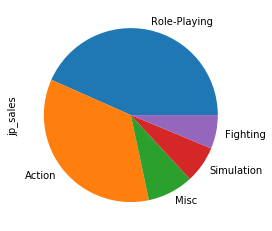

In [78]:
# Код ревьюера 
jp_top.plot.pie()

## 5 Проверка гипотез

Проверяем гипотезу равенстве средних пользовательских рейтингов у платформ Xbox One и PC ;

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различные

пороговое значение alpha зададим равным 0.05



In [70]:
xbox = actual.query('platform=="XOne" and user_score >=0')['user_score']
pc = actual.query('platform=="PC" and user_score >=0')['user_score']
result = st.ttest_ind(xbox, pc).pvalue
alpha = 0.05
if result < alpha:
    print(result, 'Принимаем альтернативную гипотезу ')
else:
    print(result, 'Принимаем нулевую гипотезу')

0.5535080500643661 Принимаем нулевую гипотезу


<s><font color='brown'>Мы все же не можем говорить, что она точно верна. У нас просто, вследствие проведенного теста, нет повода её отвергнуть.

Проверяем гипотезу о различии средних пользовательские рейтингов жанров Action и Sports.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза: средний пользовательский рейтинг для жанра Action выше чем для жанра Sports

пороговое значение alpha зададим равным 0.05

In [71]:
action = actual.query('genre=="Action" and user_score >=0')['user_score']
sport = actual.query('genre=="Sports" and user_score >=0')['user_score']
result = st.ttest_ind(action, sport).pvalue
alpha = 0.05
if result < alpha:
    print(result, 'Принимаем альтернативную гипотезу')
else:
    print(result, 'Принимаем нулевую гипотезу')

3.7163089460934874e-26 Принимаем альтернативную гипотезу


<font color='blue'>Здесь та же проблема. Пожалуй, будет уместна цитата из теории:  
    
*Данные никогда не смогут доказать или подтвердить гипотезу. Это принципиально важно: обладая лишь выборкой, мы никогда не знаем ничего о генеральной совокупности достоверно. А если бы и знали, статистический тест был бы уже не нужен.  
Мы можем лишь сделать предположение о генеральной совокупности, и при условии того, что оно верно, посчитать, насколько вероятно увидеть в выборке то, что мы в ней видим. Если эта вероятность относительно высока — данные не дают основания отвергнуть это предположение. Если эта вероятность низка — по наблюдаемым данным можно сделать вывод, что, скорее всего, наше предположение всё-таки неверно (но не опровергнуть его и не доказать обратное).*

### Выводы
Были проверены две гипотезы о зависимости пользовательского рейтинга в оценке игровых платформ и игровых жанров

Не отвергается предположение о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы


Принято предположение о том, что средние пользовательские рейтинги жанров Action выше, чем у Sports. Косвено об этом может свидетельствовать  объемы продаж игр этих жанров.


Выяснили, что средние пользовательские рейтинги для платформ XOne и PC  статистически значимо не отличаются
Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports различаются

<font color='brown'>В общем, выводы стоит немного подкорректировать. (Хотя результаты и суть верны.)

## Общий вывод
Для планирования рекламных компаний на 2017 год были проанализированна данные по продажам игр различных жанров, выпущенных для 31 игровой платформы, в период с 1980 по 2016, имеющих пользовательский рейтинг, оценку критиков итд.

Установлено:
- продажи на рыноке игр и игровых платформ демонстрируют устойчивую тенденцию к снижению.
- для адекватного прогноза следует использовать данные за период последних 5 лет (2012-2016)
- при планировании глобальных продаж, возможно нужно сделать ставку на платформу PS4, популярную во в всех регионах. Продажи для этой платфомы находятся в стадии роста.
- успешней будут продаваться игры имеющие оценки критиков и рейтинг ESRB "для всех" (Е)

- При планировании региональных рекламных компаний важен учет региональной специфики:
Америка- игры жанра Action для PS4, Европа -Action для PS4, в Японии Role-playing для 3DS и PS4

 

<s><font color='brown'>Здесь я бы хотел обратить твое внимание на графики продаж PS3 и X360, без учета 16-го года. Оцени тренды. Стоит ли их выделять, как перпективные платформы?

<font color='green'>С остальными выводам вполне согласен. Молодец, что добавил выводы по жанрам.

<font color='blue'>Итак, у тебя отличный сборный проект. Ты показываешь хорошее владение всем изучаемым в модуле материалом. Уверенно пользуешься pandas, умеешь очищать данные, строишь отличные наглядные визуализации. Делаешь четкие обоснованные выводы. К оформлению работы также претензий нет.  
 Однако некоторые замечаний у меня все же нашлись, уверен, тебе не составит труда их учесть и довести работу до идеала. Буду ждать доработанный проект, успехов!

<b><font color='blue'>Хорошая доработка, принимаю проект. Поздравляю с окончанием модуля, впереди машинное обучение!